In [1]:
# Nativos
import random as rn
import os
import sys
import gc

#calculo
import numpy as np
import pandas as pd
import scipy as sp

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")

#warning ignore future
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
gc.collect()

BASE_DIR = os.path.dirname(os.getcwd())
if BASE_DIR not in sys.path: sys.path.append(BASE_DIR)

from utils import *
#from graphs import *

SEED = 29082013
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

subfolder = "data"
os.listdir(subfolder)

['.ipynb_checkpoints',
 'CONTENT_CATEGORY.zip',
 'CONTENT_CATEGORY_BOTTOM.zip',
 'CONTENT_CATEGORY_TOP.zip',
 'conversiones.zip',
 'data.zip',
 'data2.zip',
 'device_data.zip',
 'PAGE.zip',
 'pageviews.zip',
 'pageviews_complemento.zip',
 'pageview_with_previous_2.csv',
 'sampleSubmission.zip',
 'SITE_ID.zip']

### >> Load data

In [2]:
col_user = 'USER_ID'
data = pd.read_csv(
    "{}/pageviews.zip".format(subfolder), parse_dates=["FEC_EVENT"], dtype=str
).sort_values(
    [col_user, "FEC_EVENT"]
)
data.shape

(17936934, 8)

In [3]:
comp = pd.read_csv(
    "{}/pageviews_complemento.zip".format(subfolder), parse_dates=["FEC_EVENT"], dtype=str
).sort_values(
    [col_user, "FEC_EVENT"]
)
comp.shape

(4933420, 8)

In [4]:
data.head()

,FEC_EVENT,PAGE,CONTENT_CATEGORY,CONTENT_CATEGORY_TOP,CONTENT_CATEGORY_BOTTOM,SITE_ID,ON_SITE_SEARCH_TERM,USER_ID
284,2018-01-01 09:56:47,14,4,2,4,2,1,0
285,2018-01-01 09:57:19,14,4,2,4,2,1,0
286,2018-01-01 09:57:48,12,4,2,4,2,1,0
287,2018-01-01 09:57:48,10,4,2,4,2,1,0
288,2018-01-01 09:57:49,11,4,2,4,2,1,0


In [5]:
comp.head()

,PAGE,CONTENT_CATEGORY,CONTENT_CATEGORY_TOP,CONTENT_CATEGORY_BOTTOM,SITE_ID,ON_SITE_SEARCH_TERM,USER_ID,FEC_EVENT
3136070,2,2,2,2,2,1,10000,2018-07-10 19:14:34
3136071,99,2,2,2,3,1,10000,2018-07-10 19:14:47
3136072,2,2,2,2,2,1,10000,2018-07-10 19:14:50
3136073,2,2,2,2,2,1,10000,2018-07-10 19:15:05
3136074,3,2,2,2,3,1,10000,2018-07-10 19:15:26


In [6]:
data['FEC_EVENT'].min(), data['FEC_EVENT'].max()

(Timestamp('2018-01-01 00:09:17'), Timestamp('2018-12-31 23:59:59'))

In [7]:
comp['FEC_EVENT'].min(), comp['FEC_EVENT'].max()

(Timestamp('2018-07-01 00:01:07'), Timestamp('2018-10-31 23:59:57'))

### >> Review unicidad

In [8]:
for col in data.columns:
    print(col, data[col].unique().shape)

print("/"*100)

for col in comp.columns:
    print(col, comp[col].unique().shape)

FEC_EVENT (10496454,)
PAGE (1725,)
CONTENT_CATEGORY (65,)
CONTENT_CATEGORY_TOP (13,)
CONTENT_CATEGORY_BOTTOM (65,)
SITE_ID (4,)
ON_SITE_SEARCH_TERM (294,)
USER_ID (11676,)
////////////////////////////////////////////////////////////////////////////////////////////////////
PAGE (1233,)
CONTENT_CATEGORY (59,)
CONTENT_CATEGORY_TOP (11,)
CONTENT_CATEGORY_BOTTOM (59,)
SITE_ID (4,)
ON_SITE_SEARCH_TERM (1,)
USER_ID (6661,)
FEC_EVENT (3209918,)


In [9]:
order_columns = list(data.columns)
order_columns

['FEC_EVENT',
 'PAGE',
 'CONTENT_CATEGORY',
 'CONTENT_CATEGORY_TOP',
 'CONTENT_CATEGORY_BOTTOM',
 'SITE_ID',
 'ON_SITE_SEARCH_TERM',
 'USER_ID']

### >> Union data

In [10]:
data = pd.concat(
    [data[order_columns], comp[order_columns]], axis=0
)
del comp
print(data.shape)

data.head()

(22870354, 8)


,FEC_EVENT,PAGE,CONTENT_CATEGORY,CONTENT_CATEGORY_TOP,CONTENT_CATEGORY_BOTTOM,SITE_ID,ON_SITE_SEARCH_TERM,USER_ID
284,2018-01-01 09:56:47,14,4,2,4,2,1,0
285,2018-01-01 09:57:19,14,4,2,4,2,1,0
286,2018-01-01 09:57:48,12,4,2,4,2,1,0
287,2018-01-01 09:57:48,10,4,2,4,2,1,0
288,2018-01-01 09:57:49,11,4,2,4,2,1,0


In [11]:
data.dtypes

FEC_EVENT                  datetime64[ns]
PAGE                               object
CONTENT_CATEGORY                   object
CONTENT_CATEGORY_TOP               object
CONTENT_CATEGORY_BOTTOM            object
SITE_ID                            object
ON_SITE_SEARCH_TERM                object
USER_ID                            object
dtype: object

In [12]:
gc.collect()

44

In [13]:
data['PAGE'].value_counts().head(10)

2     3776445
3     3663187
21     944796
27     859865
5      842710
40     768472
4      698399
20     671358
26     578360
23     527174
Name: PAGE, dtype: int64

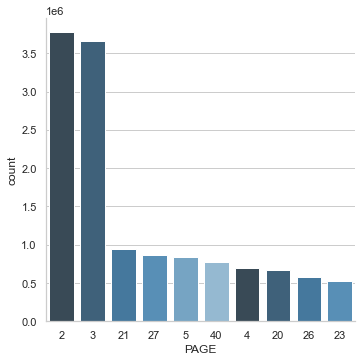

In [27]:
sns.catplot(
    x="PAGE",
    data=data[data['PAGE'].isin(list(data['PAGE'].value_counts().head(10).index))], 
    kind="count",
    order = data['PAGE'].value_counts().head(10).index,
    palette=reversed(sns.color_palette('Blues_d'))#"Blues_d" #"ch:s=.25,rot=-.25"
)

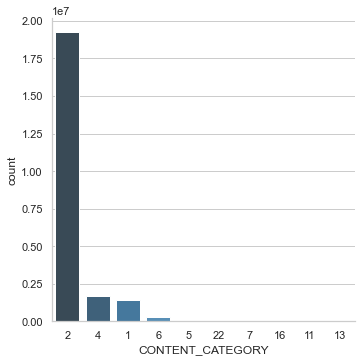

In [28]:
col_ = 'CONTENT_CATEGORY'
sns.catplot(
    x=col_,
    data=data[data[col_].isin(list(data[col_].value_counts().head(10).index))], 
    kind="count",
    order = data[col_].value_counts().head(10).index,
    palette=reversed(sns.color_palette('Blues_d'))#"Blues_d" #"ch:s=.25,rot=-.25"
)

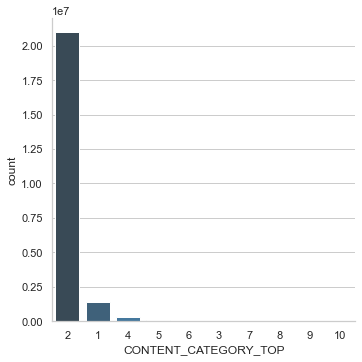

In [29]:
col_ = 'CONTENT_CATEGORY_TOP'
sns.catplot(
    x=col_,
    data=data[data[col_].isin(list(data[col_].value_counts().head(10).index))], 
    kind="count",
    order = data[col_].value_counts().head(10).index,
    palette=reversed(sns.color_palette('Blues_d'))#"Blues_d" #"ch:s=.25,rot=-.25"
)

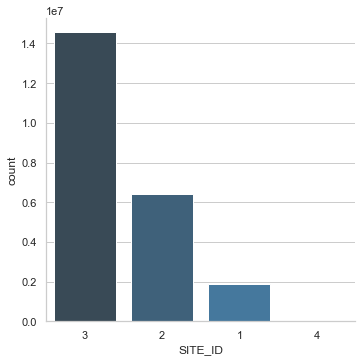

In [30]:
col_ = 'SITE_ID'
sns.catplot(
    x=col_,
    data=data[data[col_].isin(list(data[col_].value_counts().head(10).index))], 
    kind="count",
    order = data[col_].value_counts().head(10).index,
    palette=reversed(sns.color_palette('Blues_d'))#"Blues_d" #"ch:s=.25,rot=-.25"
)

In [23]:
#sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

In [15]:
%%time
serie_count = data.groupby(
    by=[col_user]
)['FEC_EVENT'].count()

display(serie_count[serie_count <= 3])

USER_ID
11084    3
11317    3
11445    2
11538    3
11674    2
Name: FEC_EVENT, dtype: int64

Wall time: 2.01 s


In [31]:
display(data.dtypes)

FEC_EVENT                  datetime64[ns]
PAGE                               object
CONTENT_CATEGORY                   object
CONTENT_CATEGORY_TOP               object
CONTENT_CATEGORY_BOTTOM            object
SITE_ID                            object
ON_SITE_SEARCH_TERM                object
USER_ID                            object
dtype: object

In [32]:
for col in data.columns:
    print(col, data[col].unique().shape)

FEC_EVENT (12397072,)
PAGE (1733,)
CONTENT_CATEGORY (65,)
CONTENT_CATEGORY_TOP (13,)
CONTENT_CATEGORY_BOTTOM (65,)
SITE_ID (4,)
ON_SITE_SEARCH_TERM (294,)
USER_ID (11676,)


In [ ]:
#data['FEC_EVENT'].dt.day.hist()

In [ ]:
#data['FEC_EVENT'].dt.hour.hist()

In [ ]:
#data['FEC_EVENT'].dt.month.hist()

In [33]:
def add_schedule_weekday(data):
    data['weekday'] = data['FEC_EVENT'].dt.weekday
    data['hour'] = data['FEC_EVENT'].dt.hour
    data['day'] = data['FEC_EVENT'].dt.day
    data['schedule'] = data['hour'].apply(get_schedule)
    data['tipo_dias'] = data['day'].apply(get_day_cut)
    data['month'] = data['FEC_EVENT'].dt.month
    data['trimestre'] = data['month'].apply(get_trimestre)

    for col in ['hour', 'day', 'month']:
        if col in data.columns:
            del data[col]
    
    return data

In [34]:
data = add_schedule_weekday(data)
data.columns

Index(['FEC_EVENT', 'PAGE', 'CONTENT_CATEGORY', 'CONTENT_CATEGORY_TOP',
       'CONTENT_CATEGORY_BOTTOM', 'SITE_ID', 'ON_SITE_SEARCH_TERM', 'USER_ID',
       'weekday', 'schedule', 'tipo_dias', 'trimestre'],
      dtype='object')

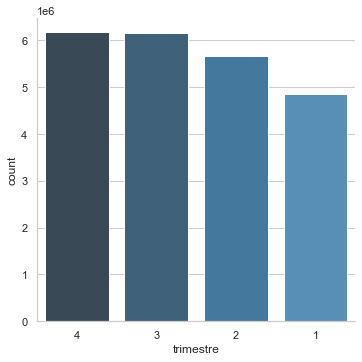

In [35]:
col_ = 'trimestre'
sns.catplot(
    x=col_,
    data=data[data[col_].isin(list(data[col_].value_counts().head(10).index))], 
    kind="count",
    order = data[col_].value_counts().head(10).index,
    palette=reversed(sns.color_palette('Blues_d'))#"Blues_d" #"ch:s=.25,rot=-.25"
)

In [ ]:
col_ = 'weekday'
sns.catplot(
    x=col_,
    data=data[data[col_].isin(list(data[col_].value_counts().head(10).index))], 
    kind="count",
    order = data[col_].value_counts().head(10).index,
    palette=reversed(sns.color_palette('Blues_d'))#"Blues_d" #"ch:s=.25,rot=-.25"
)

In [ ]:
col_ = 'tipo_dias'
sns.catplot(
    x=col_,
    data=data[data[col_].isin(list(data[col_].value_counts().head(10).index))], 
    kind="count",
    order = data[col_].value_counts().head(10).index,
    palette=reversed(sns.color_palette('Blues_d'))#"Blues_d" #"ch:s=.25,rot=-.25"
)

In [ ]:
data = data.sort_values(by=['FEC_EVENT'], ascending=True)
data.head()

In [ ]:
data.tail()

In [ ]:
data.dtypes

In [ ]:
def add_previous(userx):
    historia = 2
    
    data_userx = data[data[col_user] == userx].reset_index(drop=True)
    shape_data = data_userx.shape[0]
    
    data_userx['PAGE_PREVIOUS'] = data_userx['PAGE'].shift(1).fillna('none')
    #data_userx['PAGE_PRE_PREVIOUS'] = data_userx['PAGE'].shift(2).fillna('none')
    
    #data_userx = data_userx.drop([0, 1],axis=0)
    #data_userx['PAGE'] =  data_userx['PAGE_PRE_PREVIOUS'].astype(str) + '_' + data_userx['PAGE_PREVIOUS'].astype(str) + '_' + data_userx['PAGE'].astype(str)
    data_userx['PAGE'] =  data_userx['PAGE_PREVIOUS'].astype(str) + '_' + data_userx['PAGE'].astype(str)
    del data_userx['PAGE_PREVIOUS']
    #del data_userx['PAGE_PRE_PREVIOUS']
    
    print(userx, end=' ')     
    return data_userx

In [ ]:
usuarios = list(data[col_user].unique())
print(len(usuarios))

In [ ]:
#ventana = 100

#for posicion in range(ventana, len(usuarios) + ventana, ventana):
#    print(posicion-ventana, posicion)   

In [ ]:
%%time
from multiprocessing.dummy import Pool as ThreadPool

new_data = []
ventana = 500

for posicion in range(ventana, len(usuarios) + ventana, ventana):
    
    recolector = []
    pool = ThreadPool(10)     
    for respon in pool.map(
                     add_previous, 
                     usuarios[posicion-ventana:posicion]):
        recolector.append(respon)
    
    pool.close() 
    pool.join()
    
    new_data.extend(recolector)
    print('recolector: ', len(new_data))

In [ ]:
data = pd.concat(new_data, axis=0)
del new_data
print(data.shape)
gc.collect()

In [ ]:
(data['CONTENT_CATEGORY'] == data['CONTENT_CATEGORY_BOTTOM']).all()

In [ ]:
del data['CONTENT_CATEGORY_BOTTOM']

In [ ]:
data['CONTENT_CATEGORY'] =  data['CONTENT_CATEGORY'] + '_' + data['CONTENT_CATEGORY_TOP']
data['CONTENT_CATEGORY'].head()

In [ ]:
del data['CONTENT_CATEGORY_TOP']

In [ ]:
data = data.sort_values(by=['FEC_EVENT'], ascending=True)
data.head()

In [ ]:
data.tail()

In [ ]:
count = data['PAGE'].value_counts()
count

In [ ]:
#help(data['weekday'].plot)

In [ ]:
data['weekday'].plot(kind='bar')

In [ ]:
count[count <= 2]

In [ ]:
data.to_csv('data/pageview_with_previous_2.csv', index=False)

In [ ]:
"""
Only 3 hiatorical:   11084
Only 3 hiatorical:   11317
Only 2 hiatorical:   11445
Only 3 hiatorical:   11538
Only 2 hiatorical:   11674

"""